In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
baseline_final = pd.read_csv('../log/baseline_20250529.csv', names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [3]:
baseline_evo =  pd.read_csv('../log/baseline_evo_20250529.csv', names = ['dataset', 'train_fitness', 'val_fitness', 'test_fitness', 'seed','epoch', 'timing'])
baseline_evo.dropna(axis = 0, inplace = True)

In [4]:
baseline_evo['batch_size'] = baseline_evo.dataset.apply(lambda x: x.split('_')[1])
baseline_evo['dataset'] = baseline_evo.dataset.apply(lambda x: x.split('_')[0])

In [5]:
baseline_evo.head()

,dataset,train_fitness,val_fitness,test_fitness,seed,epoch,timing,batch_size
0,ld50,5.503653e+06,11029752.0,6492640.0,8,0,0,4
1,ld50,5.532392e+06,11029320.0,6492359.0,8,1,0,4
2,ld50,5.881492e+06,11028882.0,6492072.5,8,2,0,4
3,ld50,6.021605e+06,11028401.0,6491757.0,8,3,0,4
4,ld50,5.502551e+06,11027907.0,6491435.0,8,4,0,4


In [6]:
baseline_evo.dataset.unique()

array(['ld50'], dtype=object)

In [8]:
batch_sizes = baseline_evo.batch_size.unique()

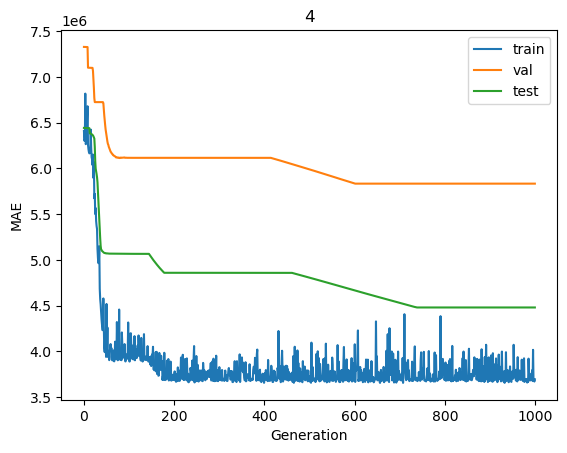

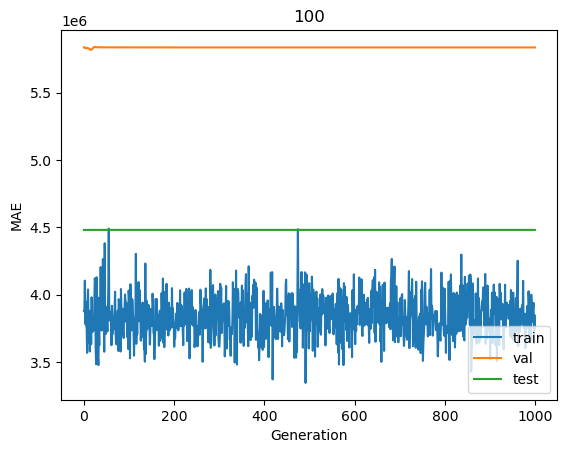

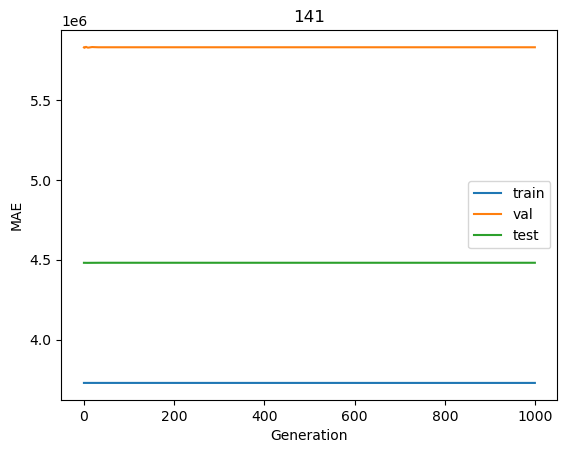

In [9]:
for bs in batch_sizes:
        
    grouped = baseline_evo[(baseline_evo['batch_size'] == bs)][
                    ['train_fitness', 'val_fitness', 'test_fitness', 'epoch']].groupby('epoch').median()
    
    plt.plot(grouped.index, grouped.train_fitness, label = 'train')
    plt.plot(grouped.index, grouped.val_fitness, label = 'val') # label = 'test',
    plt.plot(grouped.index, grouped.test_fitness, label = 'test')


    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    
    # plt.plot([i for i in range(5000)], [baseline for _ in range(5000)], color = 'black', linestyle = 'dotted', label = 'NN baseline')

    plt.title(bs)
    plt.xlabel('Generation')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

In [10]:
baseline_final

,dataset,test_fitness,seed,epoch,timing
0,ld50,2002.841064,7,1000,4483.815958
1,ld50,2072.104248,8,1000,4483.595016
2,ld50,1925.114136,1,1000,4485.920564
3,ld50,2574.852295,3,1000,4490.576111
4,ld50,2254.214600,5,1000,4493.385053
5,ld50,2160.372314,4,1000,4499.118436
6,ld50,1828.126465,6,1000,4509.509068
7,ld50,1713.101074,2,1000,4513.276898
8,ld50,2247.601318,9,1000,4515.793563
9,ld50,2528.255615,0,1000,4690.906921
